Self-Organizing Maps

In [2]:
from pre_processing_functions import *
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from minisom import MiniSom
import math

# Sklearn auxiliary items
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report


# Matplotlib Options
plt.rcParams['figure.figsize'] = [16, 8]
font = {'weight' : 'bold',
        'size'   : 14}
plt.rc('font', **font)

# Pandas options
pd.set_option("display.max_columns", None)

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

from sklearn.preprocessing import StandardScaler
import umap.umap_ as umap
import matplotlib.pyplot as plt
import seaborn as sns

%load_ext autoreload
%autoreload 2

In [3]:
df = preprocess('customer_info.csv')

In [4]:
df

,customer_id,customer_name,customer_gender,kids_home,teens_home,number_complaints,distinct_stores_visited,lifetime_spend_groceries,lifetime_spend_electronics,typical_hour,lifetime_spend_vegetables,lifetime_spend_nonalcohol_drinks,lifetime_spend_alcohol_drinks,lifetime_spend_meat,lifetime_spend_fish,lifetime_spend_hygiene,lifetime_spend_videogames,lifetime_spend_petfood,lifetime_total_distinct_products,percentage_of_products_bought_promotion,year_first_transaction,loyalty_card_number,latitude,longitude,customer_age,years_active,customer_educlevel
0,0.857433,April Clark,1.005802,0.630498,1.397496,0.222470,0.696974,-0.746485,0.522647,-0.041676,-0.020749,1.722306,0.645623,1.283549,1.653328,-0.528767,0.045856,0.731036,2.001266,-0.592996,0.723919,-1.473453,-1.210310,1.280858,-0.070294,-0.723919,None
1,-1.143473,Paul Ketchum,-0.994231,-0.905273,0.068770,-1.091753,0.696974,-0.702608,-1.013591,0.175439,0.077044,-1.336103,-1.247725,-0.322975,-0.737103,-0.659575,-1.005829,-0.613579,-0.703009,2.884929,-0.331683,0.678678,-0.613011,-0.272739,1.494428,0.331683,Bsc.
2,1.681529,Mary Downing,1.005802,0.630498,2.726221,-1.091753,2.650070,-0.349564,0.156665,0.175439,1.252036,1.786319,1.770706,0.768037,1.772232,0.432567,-0.194440,-0.839900,1.422396,-0.778881,-0.753924,-1.473453,1.823423,0.400078,-1.020305,0.753924,None
3,0.132703,Manuel Kueny,-0.994231,-0.905273,-1.259955,0.222470,-1.256123,-0.459509,3.493829,0.175439,-1.054979,-0.742202,1.741682,0.048194,-0.059196,-1.189035,0.879090,-0.320693,0.575690,-0.263788,-1.176165,-1.473453,-0.281021,-0.116035,-0.293826,1.176165,None
4,-0.312366,Curtis Tharp,-0.994231,-0.137388,0.068770,0.222470,1.348006,1.359034,-0.140867,0.175439,-0.714187,0.883022,-0.491410,0.130676,1.032558,0.694183,-0.890362,-1.159413,0.774406,-0.075508,-0.542804,0.678678,1.767444,0.312405,0.265003,0.542804,Phd.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34055,1.475526,Mary Diaz,1.005802,-0.137388,0.068770,-1.091753,-0.605091,2.022820,0.425769,0.609668,0.108160,0.178877,1.176580,-0.424203,1.333678,0.698335,-0.057128,-0.400571,0.074578,-0.581315,0.723919,-1.473453,0.136872,2.169138,-1.579134,-0.723919,None
34056,0.640352,John Gross,-0.994231,-0.137388,0.068770,-1.091753,0.045942,-0.325239,0.024460,-0.041676,-0.352651,0.961260,-0.240443,0.537462,-0.394289,0.492780,-0.419132,0.005476,1.940787,0.888538,0.935039,0.678678,-0.132179,-0.503135,-0.740890,-0.935039,None
34057,1.689232,Kathleen Harper,1.005802,-0.137388,-1.259955,0.222470,-0.605091,-0.399027,1.401167,0.826783,-0.500821,-0.767096,-0.598967,-0.757880,1.001673,-0.713559,1.269181,-1.385734,0.636169,0.632977,0.723919,-1.473453,0.927389,-0.633962,-1.635017,-0.723919,None
34058,-0.143409,Jenny Landry,1.005802,-0.137388,0.068770,0.222470,0.696974,0.758270,0.274519,-0.910135,-0.807534,0.025956,-0.540921,0.595574,0.124564,0.781388,0.011528,0.384897,-0.029100,0.305715,0.090558,0.678678,-0.715458,0.028906,0.544418,-0.090558,Msc.


In [5]:
features = ['lifetime_spend_groceries', 'lifetime_spend_electronics',
       'typical_hour', 'lifetime_spend_vegetables',
       'lifetime_spend_nonalcohol_drinks', 'lifetime_spend_alcohol_drinks',
       'lifetime_spend_meat', 'lifetime_spend_fish', 'lifetime_spend_hygiene',
       'lifetime_spend_videogames', 'lifetime_spend_petfood',
       'lifetime_total_distinct_products']


In [6]:
#distance map

#plt.pcolor(som.distance_map().T, cmap='bone_r')
#plt.colorbar()

In [7]:

def train_som_cluster(df, features, som_size=3, iterations=5000, sigma=1.0, learning_rate=0.5):
   
    df = df.copy()
    
    # 1. Extract features
    X = df[features].values

    # 2. Initialize and train SOM
    som = MiniSom(x=som_size,
                  y=som_size, 
                  input_len=X.shape[1], 
                  sigma=sigma, 
                  learning_rate=learning_rate)
    
    som.random_weights_init(X)
    np.random.seed(42)
    som.train(X, num_iteration=iterations, verbose=True)

    # 3. Assign cluster to each data point
    df['som_cluster'] = ([som.winner(X[i]) for i in range(0, len(X))])
    return df


In [8]:
df = train_som_cluster(df, features, som_size=3, iterations=5000, sigma=1.0, learning_rate=0.5)

 [ 5000 / 5000 ] 100% - 0:00:00 left 
 quantization error: 2.1962801913295817


In [9]:
df

,customer_id,customer_name,customer_gender,kids_home,teens_home,number_complaints,distinct_stores_visited,lifetime_spend_groceries,lifetime_spend_electronics,typical_hour,lifetime_spend_vegetables,lifetime_spend_nonalcohol_drinks,lifetime_spend_alcohol_drinks,lifetime_spend_meat,lifetime_spend_fish,lifetime_spend_hygiene,lifetime_spend_videogames,lifetime_spend_petfood,lifetime_total_distinct_products,percentage_of_products_bought_promotion,year_first_transaction,loyalty_card_number,latitude,longitude,customer_age,years_active,customer_educlevel,som_cluster
0,0.857433,April Clark,1.005802,0.630498,1.397496,0.222470,0.696974,-0.746485,0.522647,-0.041676,-0.020749,1.722306,0.645623,1.283549,1.653328,-0.528767,0.045856,0.731036,2.001266,-0.592996,0.723919,-1.473453,-1.210310,1.280858,-0.070294,-0.723919,None,"(1, 2)"
1,-1.143473,Paul Ketchum,-0.994231,-0.905273,0.068770,-1.091753,0.696974,-0.702608,-1.013591,0.175439,0.077044,-1.336103,-1.247725,-0.322975,-0.737103,-0.659575,-1.005829,-0.613579,-0.703009,2.884929,-0.331683,0.678678,-0.613011,-0.272739,1.494428,0.331683,Bsc.,"(1, 0)"
2,1.681529,Mary Downing,1.005802,0.630498,2.726221,-1.091753,2.650070,-0.349564,0.156665,0.175439,1.252036,1.786319,1.770706,0.768037,1.772232,0.432567,-0.194440,-0.839900,1.422396,-0.778881,-0.753924,-1.473453,1.823423,0.400078,-1.020305,0.753924,None,"(1, 2)"
3,0.132703,Manuel Kueny,-0.994231,-0.905273,-1.259955,0.222470,-1.256123,-0.459509,3.493829,0.175439,-1.054979,-0.742202,1.741682,0.048194,-0.059196,-1.189035,0.879090,-0.320693,0.575690,-0.263788,-1.176165,-1.473453,-0.281021,-0.116035,-0.293826,1.176165,None,"(2, 1)"
4,-0.312366,Curtis Tharp,-0.994231,-0.137388,0.068770,0.222470,1.348006,1.359034,-0.140867,0.175439,-0.714187,0.883022,-0.491410,0.130676,1.032558,0.694183,-0.890362,-1.159413,0.774406,-0.075508,-0.542804,0.678678,1.767444,0.312405,0.265003,0.542804,Phd.,"(1, 1)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34055,1.475526,Mary Diaz,1.005802,-0.137388,0.068770,-1.091753,-0.605091,2.022820,0.425769,0.609668,0.108160,0.178877,1.176580,-0.424203,1.333678,0.698335,-0.057128,-0.400571,0.074578,-0.581315,0.723919,-1.473453,0.136872,2.169138,-1.579134,-0.723919,None,"(2, 2)"
34056,0.640352,John Gross,-0.994231,-0.137388,0.068770,-1.091753,0.045942,-0.325239,0.024460,-0.041676,-0.352651,0.961260,-0.240443,0.537462,-0.394289,0.492780,-0.419132,0.005476,1.940787,0.888538,0.935039,0.678678,-0.132179,-0.503135,-0.740890,-0.935039,None,"(1, 1)"
34057,1.689232,Kathleen Harper,1.005802,-0.137388,-1.259955,0.222470,-0.605091,-0.399027,1.401167,0.826783,-0.500821,-0.767096,-0.598967,-0.757880,1.001673,-0.713559,1.269181,-1.385734,0.636169,0.632977,0.723919,-1.473453,0.927389,-0.633962,-1.635017,-0.723919,None,"(2, 1)"
34058,-0.143409,Jenny Landry,1.005802,-0.137388,0.068770,0.222470,0.696974,0.758270,0.274519,-0.910135,-0.807534,0.025956,-0.540921,0.595574,0.124564,0.781388,0.011528,0.384897,-0.029100,0.305715,0.090558,0.678678,-0.715458,0.028906,0.544418,-0.090558,Msc.,"(1, 1)"


In [10]:
import umap

/Users/matildepanarra/anaconda3/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/matildepanarra/anaconda3/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


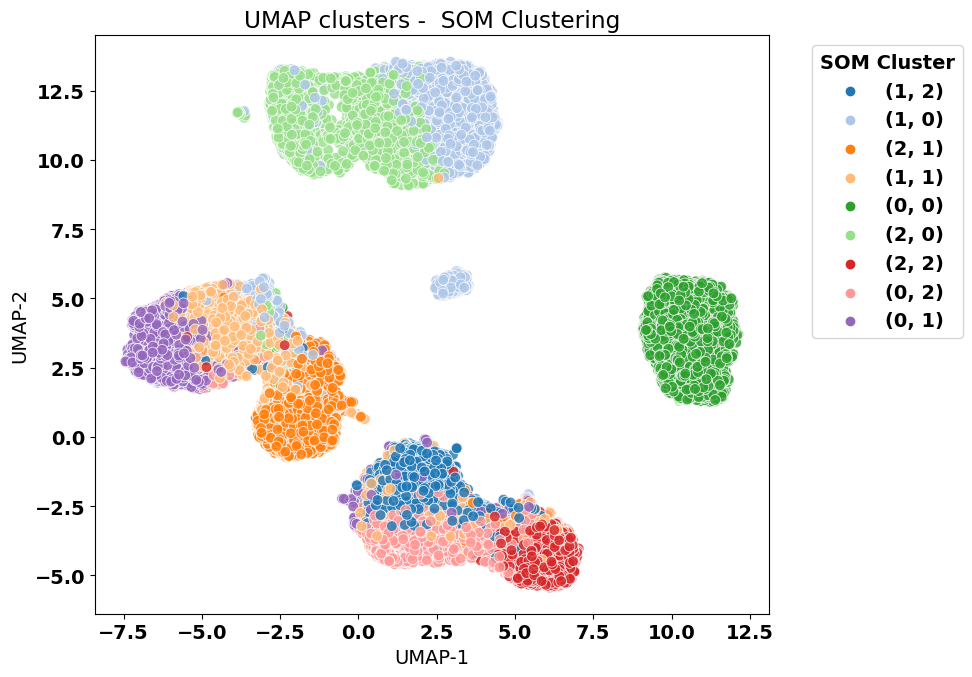

In [11]:
 # Fit UMAP
umap_object = umap.UMAP(n_neighbors=5, random_state=2)
umap_embedding = umap_object.fit_transform(df[features])
# Optional: Add UMAP coordinates to df
df['umap_1'] = umap_embedding[:, 0]
df['umap_2'] = umap_embedding[:, 1]
## Plot UMAP colored by SOM clusters
plt.figure(figsize=(10, 7))
sns.scatterplot(x='umap_1', y='umap_2', data=df, hue=df['som_cluster'].astype(str),
                palette='tab20', s=60, alpha=0.8)
plt.title("UMAP clusters -  SOM Clustering")
plt.xlabel("UMAP-1")
plt.ylabel("UMAP-2")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='SOM Cluster')
plt.tight_layout()
plt.show()


In [12]:
df.groupby('som_cluster').size().sort_values()

som_cluster
(0, 2)    2682
(2, 2)    2704
(0, 1)    3152
(2, 1)    3499
(1, 2)    3691
(1, 1)    3811
(1, 0)    4548
(0, 0)    4557
(2, 0)    4890
dtype: int64